## Final Project 

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [26]:
%autosave 10

Autosaving every 10 seconds


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set options

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


In [30]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df = pd.read_csv ('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
## I am not loading movie_info_df because I decided to not use the unique info (synopsis) from this table in my project
# movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t') 
## I am not loading reviews_df because I decided to not use the unique info (review) from this table in my project
# reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding= 'unicode_escape', delimiter = '\t')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [33]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
imdb_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [35]:
imdb_title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [37]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [10]:
imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [11]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Check shapes and info

In [23]:
## Check shapes ##
print(f'Shape of movie_gross_df is {movie_gross_df.shape}')
print(f'Shape of imdb_name_basics_df is {imdb_name_basics_df.shape}')
print(f'Shape of imdb_title_akas is {imdb_title_akas_df.shape}')
print(f'Shape of imdb_title_basics_df  is {imdb_title_basics_df .shape}')
print(f'Shape of imdb_title_crew_df is {imdb_title_crew_df.shape}')
print(f'Shape of imdb_title_principals_df is {imdb_title_principals_df.shape}')
print(f'Shape of imdb_title_ratings_df is {imdb_title_ratings_df.shape}')
print(f'Shape of tmdb_movies_df is {tmdb_movies_df.shape}')
print(f'Shape of movie_budgets_df is {movie_budgets_df.shape}')


Shape of movie_gross_df is (3387, 5)
Shape of imdb_name_basics_df is (606648, 6)
Shape of imdb_title_akas is (331703, 8)
Shape of imdb_title_basics_df  is (146144, 6)
Shape of imdb_title_crew_df is (146144, 3)
Shape of imdb_title_principals_df is (1028186, 6)
Shape of imdb_title_ratings_df is (73856, 3)
Shape of tmdb_movies_df is (26517, 10)
Shape of movie_budgets_df is (5782, 6)


In [50]:
## Check info ##
print('----------------movie_gross_df--------------------')
movie_gross_df.info()
print('----------------imdb_name_basics_df--------------------')
imdb_name_basics_df.info()
print('----------------imdb_title_akas_df--------------------')
imdb_title_akas_df.info()
print('----------------imdb_title_basics_df--------------------')
imdb_title_basics_df.info()
print('----------------imdb_title_crew_df-------------------')
imdb_title_crew_df.info()
print('----------------imdb_title_principals_df--------------------')
imdb_title_principals_df.info()
print('----------------imdb_title_ratings_df--------------------')
imdb_title_ratings_df.info()
print('----------------tmdb_movies_df--------------------')
tmdb_movies_df.info() 
print('----------------movie_budgets_df--------------------')
movie_budgets_df.info()

----------------movie_gross_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
----------------imdb_name_basics_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
----------------imdb_title_akas_df--------------------
<class 'pandas.core.frame.DataFrame'>
Ran

In [41]:

## Check invalid (nan) values ##
movie_gross_df.isna().sum()
imdb_name_basics_df.isna().sum()
imdb_title_akas_df.isna().sum()
imdb_title_basics_df.isna().sum()
imdb_title_crew_df.isna().sum()
imdb_title_principals_df.isna().sum()
imdb_title_ratings_df.isna().sum()
tmdb_movies_df.isna().sum()
movie_budgets_df.isna().sum()


title             0   
studio            5   
domestic_gross    28  
foreign_gross     1350
year              0   
dtype: int64

nconst                0     
primary_name          0     
birth_year            523912
death_year            599865
primary_profession    51340 
known_for_titles      30204 
dtype: int64

title_id             0     
ordering             0     
title                0     
region               53293 
language             289988
types                163256
attributes           316778
is_original_title    25    
dtype: int64

tconst             0    
primary_title      0    
original_title     21   
start_year         0    
runtime_minutes    31739
genres             5408 
dtype: int64

tconst       0    
directors    5727 
writers      35883
dtype: int64

tconst        0     
ordering      0     
nconst        0     
category      0     
job           850502
characters    634826
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data cleaning

In [52]:
len(movie_gross_df)

3387

In [53]:
movie_gross_df = movie_gross_df.dropna() 

In [54]:
len(movie_gross_df)

2007

In [ ]:
movie_gross_df[movie_gross_df['foreign_gross'] == "1,131.6"]

In [ ]:
movie_gross_df[movie_gross_df['foreign_gross'] == "1,131.6"].index

In [ ]:
# [float(a) for a in movie_gross_df['foreign_gross']]
for i, row in movie_gross_df.iterrows():
    if not isinstance(row['foreign_gross'], str):
        print(i, row['foreign_gross'])

In [81]:
movie_gross_df = movie_gross_df.drop(movie_gross_df[[movie_gross_df['foreign_gross'].isna()]])

ValueError: Item wrong length 1 instead of 2007.

In [ ]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(lambda x: x.replace(',',''))
# movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(lambda x: x.replace('.',''))


In [ ]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

In [ ]:
sum_column = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']
movie_gross_df["total_gross"] = sum_column

In [ ]:
movie_gross_df.head(100)

In [ ]:
movie_gross_df['studio'].nunique()

In [ ]:
movie_gross_df = movie_gross_df.sort_values(by='total_gross', ascending = False)

In [ ]:
movie_gross_df.head()

In [ ]:
movie_gross_df=movie_gross_df.sort_values(by ='total_gross', ascending = False)

## Plot the high budget studios

In [ ]:

sns.set(rc={'figure.figsize':(35,8.27)})
sns.barplot(x="studio", y="total_gross", data=movie_gross_df)


########### groupby mean, belli bir degerin altini plot a alma 

In [ ]:
print(imdb_name_basics_df.shape)
imdb_name_basics_df.head()


In [ ]:

# imdb_title_akas_df.head(110)

imdb_title_akas_df = imdb_title_akas_df[pd.notnull(imdb_title_akas_df['region'])]

imdb_title_akas_df = imdb_title_akas_df.drop(imdb_title_akas_df['region'!= 'US'].index)

# test = pd.DataFrame({'x': np.random.randn(int(1e6))})
# test = test.drop(test[test.x > 0].index)

# imdb_title_akas_df= imdb_title_akas_df[(imdb_title_akas_df['region'] =='US' ).all(axis=0)]

In [ ]:
imdb_title_akas_df.head(110)

In [ ]:
type(imdb_title_akas_df['region'][80])

In [ ]:
imdb_title_basics_df.head(100)

In [ ]:
len(imdb_title_basics_df)

In [ ]:
imdb_title_basics_df['genres'].isna().sum()

In [ ]:
imdb_title_basics_df['genres'].dropna(inplace = True) 

In [ ]:
len(imdb_title_basics_df)

In [ ]:
imdb_title_basics_df.dropna(inplace = True) 


In [ ]:
imdb_title_basics_df.head(20)

In [ ]:
len(imdb_title_basics_df)

In [ ]:
imdb_title_basics_df['genres'].nunique()

In [ ]:
imdb_title_basics_df=imdb_title_basics_df.drop_duplicates(subset='primary_title', keep='first')

In [ ]:
len(imdb_title_basics_df)

In [ ]:
# imdb_title_basics_df["genres"]= imdb_title_basics_df["genres"].str.rsplit(",", n = 1, expand = True) 
# ???????????

In [ ]:
imdb_title_basics_df['genres'].isna().sum()

In [ ]:
imdb_title_basics_df['genres'] = [a.split(",") for a in imdb_title_basics_df['genres']]

# split_genres = imdb_title_basics_df['genres'].split(",")
# imdb_title_basics_df = split_genres.to_list()
# names = ["genres1", "genres2", "genres3"]
# new_imdb_title_basics_df = pd.DataFrame(imdb_title_basics_df, columns=names)

## Plot the budget and gross

In [55]:

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x.strip('$'))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x.replace(',',''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.strip('$'))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.replace(',',''))




In [56]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x.strip('$'))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x.replace(',',''))


In [57]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [58]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(float)

In [59]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(float)

In [60]:
type(movie_budgets_df['production_budget'][0])

numpy.float64

In [61]:
movie_budgets_df['release_month'] = [a[0:3] for a in movie_budgets_df['release_date']]

In [62]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec


(-50000000.0, 894012871.8263204)

(-300000000.0, 2964909107.662575)

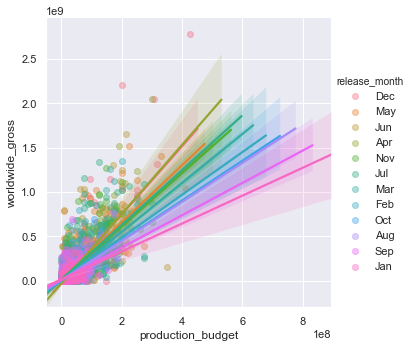

In [74]:
sns.lmplot(x="production_budget", y="worldwide_gross",hue= 'release_month', data=movie_budgets_df, scatter_kws={'alpha': 0.4})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])


(-50000000.0, 894012871.8263204)

(-300000000.0, 1048754933.6080878)

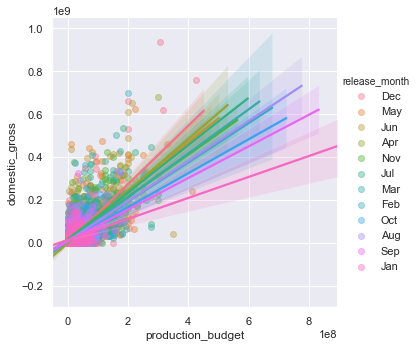

In [79]:
sns.lmplot(x="production_budget", y="domestic_gross", hue= 'release_month', data=movie_budgets_df, scatter_kws={'alpha': 0.4})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])